
# Sentiment Analysis with VADER and TextBlob

In this tutorial, we will perform **sentiment analysis** on Spotify app reviews using two different **pretrained models**:

1. **VADER (Valence Aware Dictionary and sEntiment Reasoner)** - A lexicon-based sentiment analysis tool optimized for short text.
2. **TextBlob** - A simple rule-based tool that provides polarity and subjectivity scores.

We will compare their results to see how they classify positive, negative, and neutral sentiment in the reviews.



## Step 1: Load the Dataset

First, we will load the dataset into a pandas DataFrame and inspect its structure.


In [2]:

import pandas as pd

# Load the dataset
df = pd.read_csv('spotify_reviews_cleaned.csv', parse_dates=['time_submitted'])  # Replace with your cleaned file path
print(f"Dataset contains {len(df)} reviews.")
df.head()


Dataset contains 61594 reviews.


,time_submitted,review,rating,total_thumbsup,reply,review_length,cleaned_review,cleaned_review_length
0,2022-01-01 00:19:09,Its good but sometimes it doesnt load the musi...,4,0,NaN,216,good sometimes doesnt load music play like sec...,115
1,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,2,1,NaN,272,app good hard navigate wont let play song clic...,142
2,2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10,NaN,493,app would good taking device start comp there ...,296
3,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0,NaN,263,use sooo good back downloaded free version cou...,168
4,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN,279,even though communicated lyric feature availab...,179



## Step 2: Sentiment Analysis with VADER

[VADER](https://github.com/cjhutto/vaderSentiment) is a lexicon-based sentiment analysis tool designed for **short text**, such as social media posts and reviews.
It assigns a **compound score** between -1 and 1 to determine sentiment polarity.

### **How to interpret VADER scores?**
- **Positive sentiment**: Compound score > 0.05
- **Negative sentiment**: Compound score < -0.05
- **Neutral sentiment**: Compound score between -0.05 and 0.05


In [4]:

from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER Lexicon
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dina.deifallah/nltk_data...


In [5]:
# check the SentimentIntensityAnalyzer methods

print(dir(sia))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_amplify_ep', '_amplify_qm', '_but_check', '_idioms_check', '_least_check', '_never_check', '_punctuation_emphasis', '_sift_sentiment_scores', 'constants', 'lexicon', 'lexicon_file', 'make_lex_dict', 'polarity_scores', 'score_valence', 'sentiment_valence']


In [7]:
sample_review = df['cleaned_review'][20]

print(sample_review)

mostly original soundtrack giving wonderful listening experience track arent original soundtrack one autovolume missing track arent upto mark equaliser provision also better feature


In [8]:
sia.polarity_scores(sample_review)

{'neg': 0.067, 'neu': 0.518, 'pos': 0.415, 'compound': 0.886}

In [13]:

# Function to compute VADER sentiment score
def compute_vader_score(text):
    """Returns the VADER sentiment score for a given text."""
    return sia.polarity_scores(text)['compound']

# Function to assign sentiment label based on score
def assign_vader_label(score):
    """Assigns sentiment label based on VADER score."""
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'


# Apply sentiment score computation
df['vader_score'] = df['cleaned_review'].apply(compute_vader_score)

# Apply sentiment classification
df['vader_label'] = df['vader_score'].apply(assign_vader_label)

# Display results
df[['cleaned_review', 'vader_score', 'vader_label']].head()

,cleaned_review,vader_score,vader_label
0,good sometimes doesnt load music play like sec...,0.7402,positive
1,app good hard navigate wont let play song clic...,-0.3834,negative
2,app would good taking device start comp there ...,-0.7854,negative
3,use sooo good back downloaded free version cou...,0.8654,positive
4,even though communicated lyric feature availab...,0.5831,positive



## Step 3: Sentiment Analysis with TextBlob

[TextBlob](https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis) provides **polarity scores** between -1 and 1 to indicate sentiment.
Unlike VADER, TextBlob also provides a **subjectivity score** between 0 and 1.

### **How to interpret TextBlob scores?**
- **Positive sentiment**: Polarity > 0
- **Negative sentiment**: Polarity < 0
- **Neutral sentiment**: Polarity = 0


### How Does it Work?


**Lexicon-Based Approach:**

 - TextBlob uses a predefined sentiment dictionary (from PatternAnalyzer).
 - Each word in the text is assigned a polarity score (e.g., great = 0.8, terrible = -0.9).
 - If a word modifier (e.g., very, not) is present, it adjusts the score accordingly.
 - The final polarity is an average of all word scores.
 - Handling Negation: words like "not good" reduce polarity (good might have 0.7, but not decreases it).
 - Sentence-Level Aggregation: if multiple sentences exist, TextBlob averages the polarity across all of them.


In [11]:
!pip install textblob
from textblob import TextBlob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/1e/d6/40aa5aead775582ea0cf35870e5a3f16fab4b967f1ad2debe675f673f923/textblob-0.19.0-py3-none-any.whl.metadata
  Obtaining dependency information for nltk>=3.9 from https://files.pythonhosted.org/packages/4d/66/7d9e26593edda06e8cb531874633f7c2372279c3b0f46235539fe546df8b/nltk-3.9.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 5.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [14]:


# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Function to assign sentiment label based on TextBlob score
def assign_textblob_label(score):
    """Assigns sentiment label based on TextBlob polarity score."""
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'


# Apply TextBlob sentiment analysis
df['textblob_score'] = df['cleaned_review'].apply(get_sentiment)

# Apply sentiment classification
df['textblob_label'] = df['textblob_score'].apply(assign_textblob_label)


# Display results
df[['cleaned_review', 'textblob_score', 'textblob_label']].head()


,cleaned_review,textblob_score,textblob_label
0,good sometimes doesnt load music play like sec...,0.500000,positive
1,app good hard navigate wont let play song clic...,0.302778,positive
2,app would good taking device start comp there ...,-0.117708,negative
3,use sooo good back downloaded free version cou...,0.400000,positive
4,even though communicated lyric feature availab...,0.162500,positive



## Step 4: Comparing VADER and TextBlob Results

Now that we have sentiment classifications from both models, we will compare their outputs.

### **1. Do they agree on sentiment classification?**
We will check how often the sentiment labels from VADER and TextBlob match.

### **2. Distribution of sentiment scores**
We will visualize the distribution of sentiment scores for both models to understand how they rate the reviews differently.


In [15]:
# creating a boolean column for agreement

# Check agreement between models
df['agreement'] = df.apply(lambda row: row['vader_label'] == row['textblob_label'], axis=1)

df.head()

,time_submitted,review,rating,total_thumbsup,reply,review_length,cleaned_review,cleaned_review_length,vader_score,vader_label,textblob_score,textblob_label,agreement
0,2022-01-01 00:19:09,Its good but sometimes it doesnt load the musi...,4,0,NaN,216,good sometimes doesnt load music play like sec...,115,0.7402,positive,0.500000,positive,True
1,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,2,1,NaN,272,app good hard navigate wont let play song clic...,142,-0.3834,negative,0.302778,positive,False
2,2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10,NaN,493,app would good taking device start comp there ...,296,-0.7854,negative,-0.117708,negative,True
3,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0,NaN,263,use sooo good back downloaded free version cou...,168,0.8654,positive,0.400000,positive,True
4,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN,279,even though communicated lyric feature availab...,179,0.5831,positive,0.162500,positive,True


In [16]:
# agreement rate over all the data

agreement_rate = df['agreement'].mean() * 100
print(f"Agreement between VADER and TextBlob: {agreement_rate:.2f}%")


Agreement between VADER and TextBlob: 73.69%


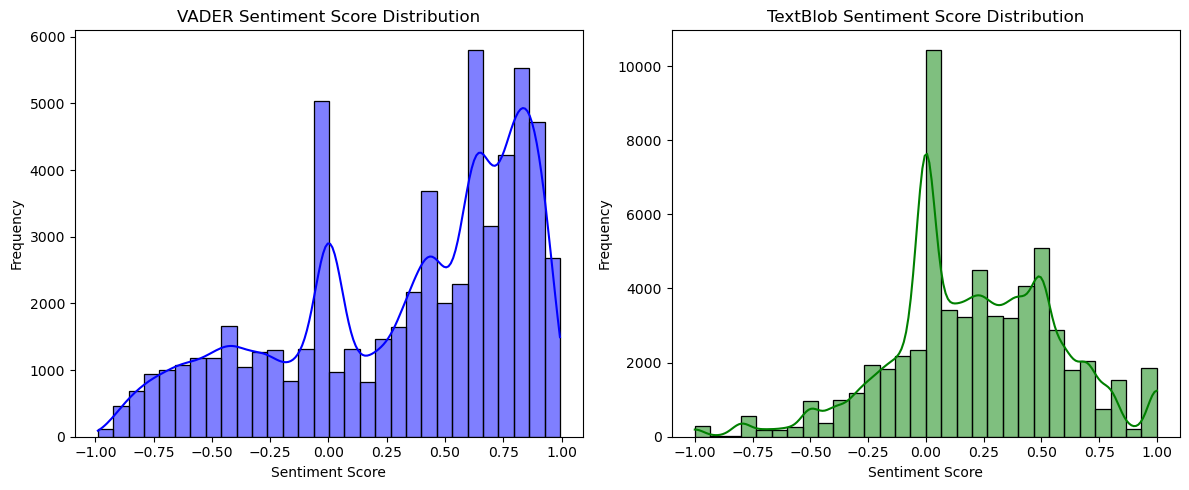

In [17]:

import matplotlib.pyplot as plt
import seaborn as sns


# Plot sentiment distributions
plt.figure(figsize=(12, 5))

# VADER Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['vader_score'], bins=30, kde=True, color='blue')
plt.title('VADER Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# TextBlob Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['textblob_score'], bins=30, kde=True, color='green')
plt.title('TextBlob Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



## Conclusion

- **VADER** and **TextBlob** generally provide similar sentiment classifications, but **they may disagree on certain cases**.
- **VADER** is optimized for short text and incorporates intensity, making it useful for social media-style reviews.
- **TextBlob** provides **subjectivity analysis**, which can help determine if a review is factual or opinion-based.
- Further analysis can involve **deep learning models** (e.g., BERT-based models) for more **context-aware sentiment detection**

